<a href="https://colab.research.google.com/github/Chandra142/SkillCraft_Internship/blob/main/SCT_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Model Evaluation:
Mean Squared Error: 2,848,523,443.42
R-squared Score: 0.6286
Enter square footage: 1000
Enter number of bedrooms: 1
Enter number of bathrooms: 1

🏠 Estimated Price for your input: $157,937.15


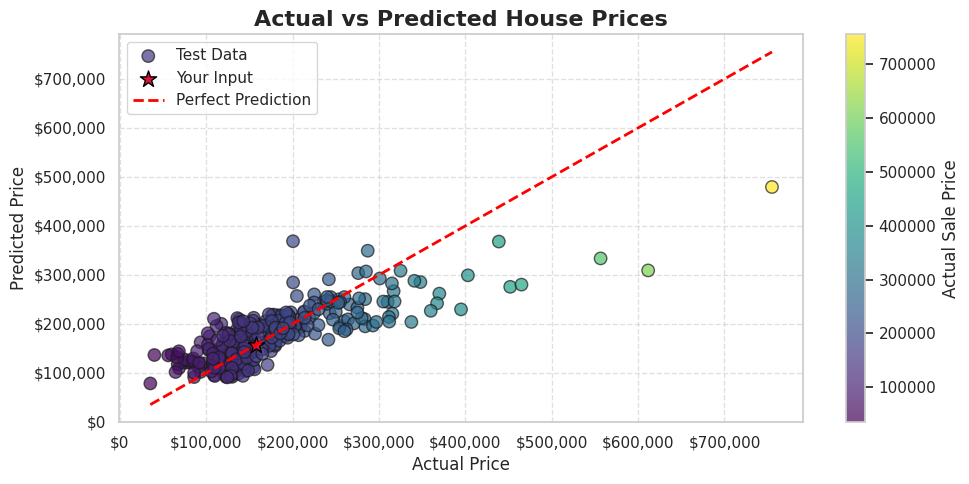

1

In [10]:
# 🛠️ Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import FuncFormatter

# 📥 Load dataset
df = pd.read_csv('/content/train.csv')  # Adjust path if needed

# ➕ Create derived feature
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']

# 🎯 Define features and target
X = df[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]
y = df['SalePrice']

# 📊 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔮 Make predictions on test set
y_pred = model.predict(X_test)

# 📉 Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"R-squared Score: {r2:.4f}")

# 👤 Take real-time user input
sqft_input = int(input("Enter square footage: "))
bedrooms_input = int(input("Enter number of bedrooms: "))
bathrooms_input = float(input("Enter number of bathrooms: "))

# 🔍 Prepare input for prediction
input_data = pd.DataFrame([{
    'GrLivArea': sqft_input,
    'BedroomAbvGr': bedrooms_input,
    'TotalBathrooms': bathrooms_input
}])

# 🔮 Predict price for custom input
predicted_price = model.predict(input_data)[0]
print(f"\n🏠 Estimated Price for your input: ${predicted_price:,.2f}")

# 📈 Plot: Actual vs Predicted + Custom Input
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Original predictions
scatter = plt.scatter(
    y_test, y_pred,
    c=y_test, cmap='viridis',
    edgecolors='k', s=80, alpha=0.7,
    label='Test Data'
)

# Custom input prediction (plotted as red star)
plt.scatter(
    [predicted_price], [predicted_price],
    color='crimson', s=150,
    label='Your Input', edgecolors='black', marker='*'
)

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red', linestyle='--', linewidth=2,
    label='Perfect Prediction'
)

# Formatting
plt.title("Actual vs Predicted House Prices", fontsize=16, weight='bold')
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)

formatter = FuncFormatter(lambda x, _: f"${int(x):,}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Actual Sale Price", fontsize=12)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
1